In [63]:
import os 
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, f1_score
import seaborn as sns

In [64]:
filter(os.path.isfile, os.listdir( '../results' ) )

[]

In [70]:
files = os.listdir( '../results' )
files.remove('old')
files=[x for x in files if 'balanced' in x]

In [71]:
concat_df = pd.DataFrame()
for each_file in files:
    df = pd.read_csv( "../results/" + each_file,header=None,names=['content','y_pred','y'])
    df['model'] = each_file
    concat_df=concat_df.append(df)

In [72]:
concat_df.head()

,content,y_pred,y,model
0,review await open thi hippi locat sinc right c...,1.000000,1,balanced_100K_deep_sentiment_model_1_128_3_500...
1,order cake special birthday parti wa visit fam...,0.423213,1,balanced_100K_deep_sentiment_model_1_128_3_500...
2,order beer tap flat opt pepsi food wa ok blind...,0.001580,0,balanced_100K_deep_sentiment_model_1_128_3_500...
3,white pizza like best white pizza eaten crust ...,1.000000,1,balanced_100K_deep_sentiment_model_1_128_3_500...
4,thi locat horribl come sinc thi closest hous w...,0.010673,0,balanced_100K_deep_sentiment_model_1_128_3_500...


In [81]:
list_metric = []
for each_file in files[0:]:
    metric_df = concat_df[concat_df['model']==each_file]
#     print each_file
    param1= each_file.split('_')[5]
    param2=each_file.split('_')[6]
    param3=each_file.split('_')[7]
    param4=each_file.split('_')[8]
    param5=each_file.split('_')[9]
#     print each_file
#     print classification_report(metric_df['y'], metric_df['y_pred'].round(0))
    metric_auc = roc_auc_score(metric_df['y'], metric_df['y_pred'])
    metric_f1 = f1_score(metric_df['y'], metric_df['y_pred'].round(0))
    list_metric.append([param1,param2,param3,param4,param5,metric_auc,metric_f1])

In [82]:
result_metrics = pd.DataFrame(list_metric,columns=['conv_layers','filter_size','kernel_size','embedding_size','activation','auc','f1']).sort_values('f1',ascending=False)
result_metrics

,conv_layers,filter_size,kernel_size,embedding_size,activation,auc,f1
26,5,128,3,500,relu,0.968096,0.941688
24,3,64,3,500,leakyrelu,0.956614,0.939556
9,1,64,3,500,relu,0.963597,0.938586
1,1,128,3,500,relu,0.962974,0.934110
33,5,64,3,500,leakyrelu,0.961056,0.931836
0,1,128,3,500,leakyrelu,0.962457,0.929842
34,5,64,3,500,relu,0.961502,0.929636
4,1,64,1,500,leakyrelu,0.954200,0.929562
27,5,64,1,1000,leakyrelu,0.966077,0.929539
8,1,64,3,500,leakyrelu,0.960471,0.929310


In [51]:
list_metric = []
for each_file in files:
    print each_file
    metric_df = concat_df[concat_df['model']==each_file]
    print metric_df['y_pred'].mean()

deep_sentiment_model_1_128_1_500_relu_results.csv
0.713377590072
deep_sentiment_model_1_128_3_1000_relu_results.csv
1.0
deep_sentiment_model_1_128_3_500_leakyrelu_results.csv
1.0
deep_sentiment_model_1_128_3_500_relu_results.csv
0.714939224145
deep_sentiment_model_1_128_5_1000_leakyrelu_results.csv
1.0
deep_sentiment_model_1_128_5_1000_relu_results.csv
1.0
deep_sentiment_model_1_128_5_500_leakyrelu_results.csv
1.0
deep_sentiment_model_1_128_5_500_relu_results.csv
1.0
deep_sentiment_model_2_128_5_1000_leakyrelu_results.csv
1.0
deep_sentiment_model_3_128_1_1000_relu_results.csv
0.747702564179
deep_sentiment_model_3_128_3_1000_relu_results.csv
0.728690959061
deep_sentiment_model_3_128_3_500_leakyrelu_results.csv
0.720478
deep_sentiment_model_3_128_3_500_relu_results.csv
0.726492726137
deep_sentiment_model_3_128_5_1000_leakyrelu_results.csv
1.0
deep_sentiment_model_3_128_5_1000_relu_results.csv
0.728598195543
deep_sentiment_model_3_128_5_500_leakyrelu_results.csv
0.0
deep_sentiment_model_3

,conv_layers,filter_size,kernel_size,embedding_size,activation,auc,f1
3,model,1,128,3,500,0.963290,0.939898
0,model,1,128,1,500,0.956897,0.936681
12,model,3,128,3,500,0.954909,0.936488
9,model,3,128,1,1000,0.953683,0.936674
10,model,3,128,3,1000,0.951101,0.934618
16,model,3,128,5,500,0.950396,0.925843
14,model,3,128,5,1000,0.947146,0.932474
6,model,1,128,5,500,0.500000,0.836920
7,model,1,128,5,500,0.500000,0.836920
1,model,1,128,3,1000,0.500000,0.836920


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

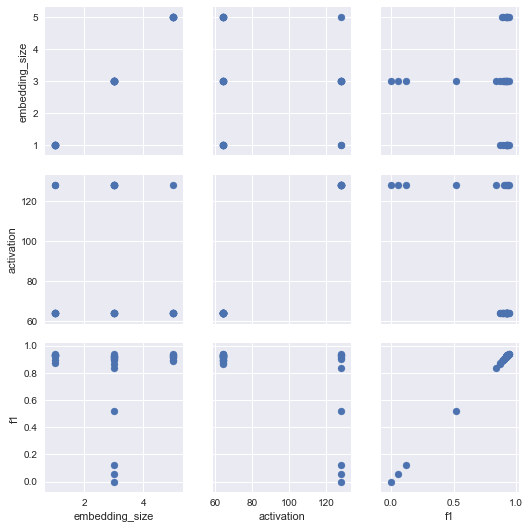

In [77]:
g = sns.PairGrid(result_metrics[['conv_layers','filter_size','kernel_size','embedding_size','activation','f1']])
g = g.map(plt.scatter)

In [42]:
result_metrics[result_metrics['embedding_size']=='1500']

,conv_layers,filter_size,kernel_size,embedding_size,activation,auc,f1
26,1,128,5,1500,leakyrelu,0.979626,0.961234
27,1,128,5,1500,relu,0.979065,0.959732


In [24]:
pd.DataFrame(list_metric,columns=['conv_layers','filter_size','kernel_size','embedding_size','activation','auc','f1']).sort_values('auc',ascending=False).to_csv('metrics_result.csv',index=False)